In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157161,2021-12-02,Pfizer/BioNTech,VEN,60-69,1291,1386,73,34,0,2570,ITH,ITH3,5,Veneto
157162,2021-12-02,Pfizer/BioNTech,VEN,70-79,1345,1421,32,31,0,2703,ITH,ITH3,5,Veneto
157163,2021-12-02,Pfizer/BioNTech,VEN,80-89,628,941,17,7,0,1545,ITH,ITH3,5,Veneto
157164,2021-12-02,Pfizer/BioNTech,VEN,90+,78,252,4,6,0,320,ITH,ITH3,5,Veneto


In [ ]:
dfpop = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
dfpop

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


il primo deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

In [ ]:
df1=df.groupby('area')[['prima_dose']].sum()
df1

,prima_dose
area,
ABR,986946
BAS,427032
CAL,1369770
CAM,4204312
EMR,3461161
FVG,897260
LAZ,4522025
LIG,1179230
LOM,7951608


In [ ]:
df2 = dfpop.groupby('area')[['totale_popolazione']].sum()
df2

,totale_popolazione
area,
ABR,1188922
BAS,494881
CAL,1689716
CAM,5104347
EMR,3998406
FVG,1088152
LAZ,5147533
LIG,1399466
LOM,9246804


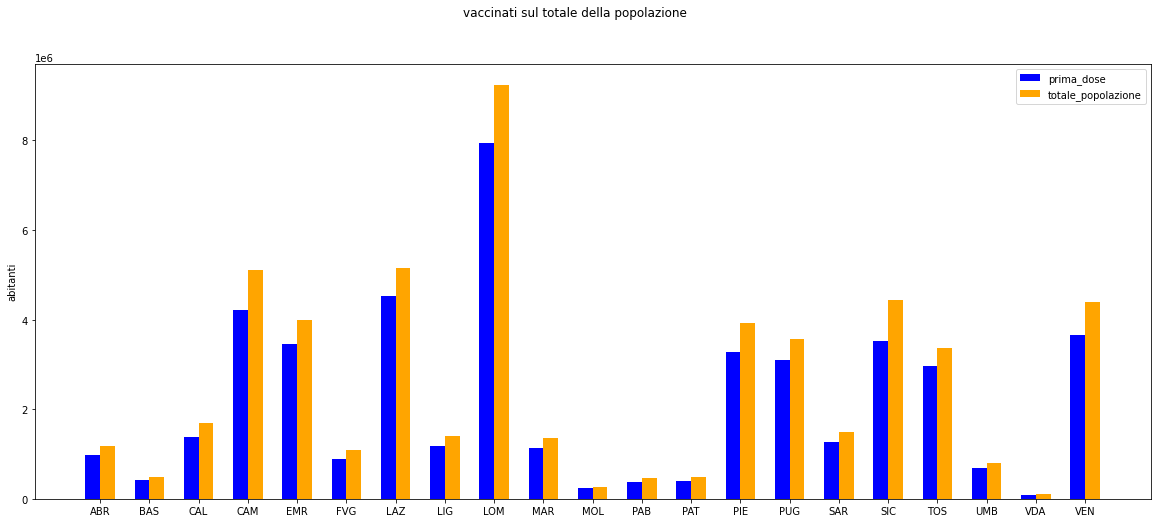

In [ ]:
x = np.arange(len(df1['prima_dose']))
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.bar(x-0.15,df1['prima_dose'],width=0.3,label='prima_dose',color="blue")
ax.bar(x+0.15,df2['totale_popolazione'],width=0.3,label='totale_popolazione',color="orange")
fig.suptitle("vaccinati sul totale della popolazione")
ax.set_xticks(x)
ax.set_xticklabels(df1.index)
ax.legend(loc=1)
plt.ylabel('abitanti')
plt.show()

il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale dei vaccinati.

In [ ]:
#bisogna fare prima_dose:totale_popolazione*100
df3 = (df1['prima_dose']/df2['totale_popolazione'])*100
df3 = df3.sort_values(ascending=False)
df3

area
TOS    88.170573
LAZ    87.848393
PUG    86.802743
MOL    86.748720
EMR    86.563521
BAS    86.289835
LOM    85.993041
UMB    85.829325
SAR    85.103381
PAT    84.729981
LIG    84.262855
VEN    83.325795
PIE    83.224867
ABR    83.011838
FVG    82.457230
MAR    82.440758
CAM    82.367284
CAL    81.065102
VDA    80.638148
SIC    79.326116
PAB    79.008171
dtype: float64

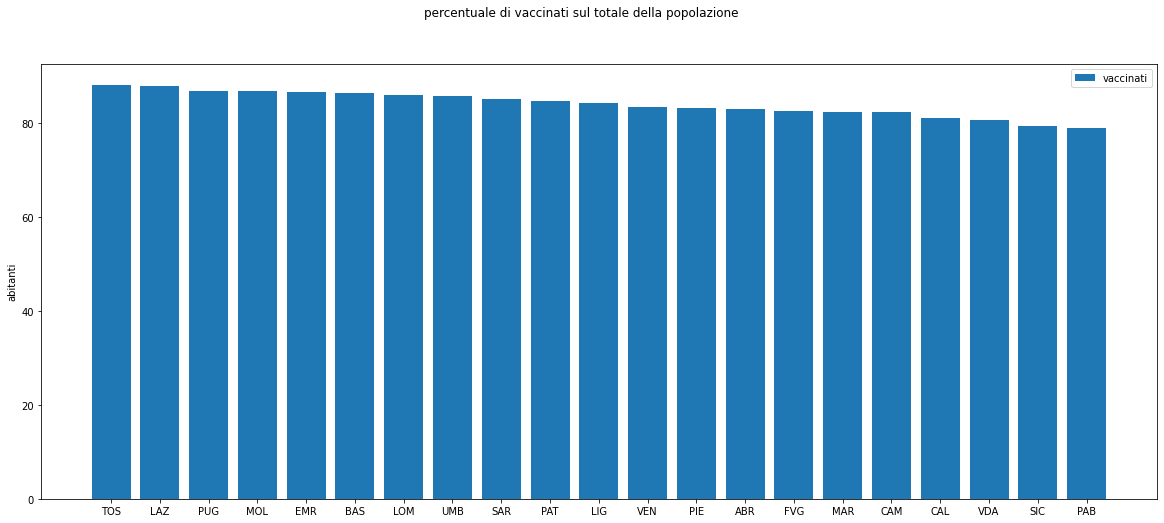

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.bar(df3.index,df3,label='vaccinati')
ax.legend(loc=1)
plt.ylabel('abitanti')
fig.suptitle("percentuale di vaccinati sul totale della popolazione")
plt.show()